### Import Required Packages

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import hstack

### Logistic Regression

In [45]:
# Insert Qwen labelled data
train_data = pd.read_csv("../data/with_features/qwen_labelled_combined_reviews_with_features.csv")

# Insert hand labelled data
test_data = pd.read_csv("../data/with_features/hand_labelled_combined_reviews_with_features.csv")

X_train= train_data[["review_text", "rating", "review_length","sentiment", "all_caps_ratio","relevancy_score"]]
y_train= train_data["label"]

X_test=test_data[["review_text", "rating", "review_length","sentiment", "all_caps_ratio","relevancy_score"]]
y_test=test_data["label"]

X_train, X_test, y_train, y_test

(                                           review_text  ...  relevancy_score
 0    Andrea is amazing. Our dog loves her and she a...  ...               48
 1    Andrea does a wonderful  job  with our wild Pr...  ...               47
 2                                    Never called back  ...               41
 3                         They don't answer the phones  ...               42
 4                   Limited information on the website  ...               42
 ..                                                 ...  ...              ...
 995                      Brett Williams is awesome!!!!  ...               41
 996  they have they the kinds of cars a teen will n...  ...               48
 997  I would not go back there for nothing, the gen...  ...               61
 998                                     Awesome prices  ...               40
 999                           Not the best but alright  ...               42
 
 [1000 rows x 6 columns],
                                    

In [46]:
# Turn words into numbers
tfidf = TfidfVectorizer(max_features=5000, stop_words="english", ngram_range=(1,2))

X_train_tfidf = tfidf.fit_transform(X_train["review_text"])
X_test_tfidf = tfidf.transform(X_test["review_text"])

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(1000, 5000)
(200, 5000)


In [47]:
# Numeric features 

# Store as numeric arrays
numeric_cols = ["rating", "review_length","sentiment", "all_caps_ratio","relevancy_score"]
X_train_numeric = X_train[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test_numeric  = X_test[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).values

# Combine TF-IDF + numeric
X_train_final = hstack([X_train_tfidf, X_train_numeric])
X_test_final = hstack([X_test_tfidf, X_test_numeric])

print(X_train_final.shape)
print(X_test_final.shape)

(1000, 5005)
(200, 5005)


### Train Model

In [48]:
clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train_final, y_train)

y_pred = clf.predict(X_test_final)

### Results

In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          Ad       0.20      0.20      0.20        10
  Irrelevant       0.10      0.71      0.18         7
        Rant       0.79      0.79      0.79        14
       Valid       0.94      0.70      0.81       169

    accuracy                           0.69       200
   macro avg       0.51      0.60      0.49       200
weighted avg       0.87      0.69      0.75       200



### Visualisations

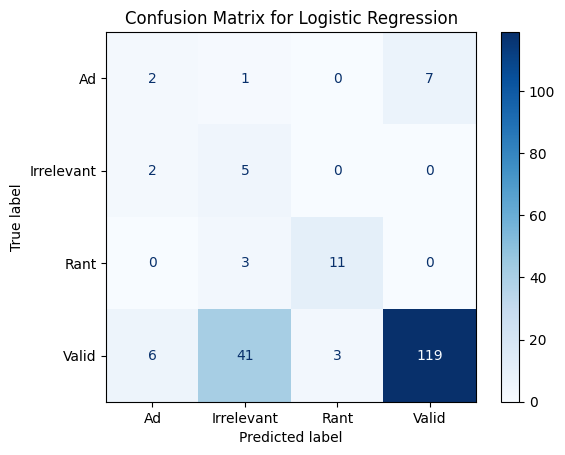

In [50]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')

plt.title('Confusion Matrix for Logistic Regression')
plt.show()

/Users/vaisiyabalakrishnan/techjam/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vaisiyabalakrishnan/techjam/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-

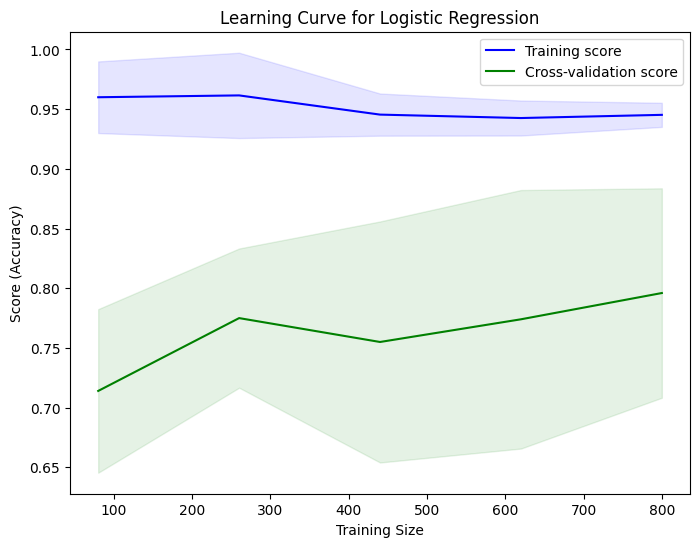

In [51]:
# Get learning curves
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_final, y_train, cv=5, n_jobs=-1)

# Calculate mean and std for train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Score (Accuracy)')
plt.legend(loc='best')
plt.show()

In [52]:
# Insert new reviews if we want to show how it works
new_reviews = ""

# Transform inputs
new_tfidf = tfidf.transform(new_reviews["review_text"])
new_numeric = new_reviews[["rating", "review_length","sentiment", "all_caps_ratio","relevancy_score"]].values
new_final = hstack([new_tfidf, new_numeric])

# Predictions
predictions = clf.predict(new_final)

# Compare true vs predicted
for review, true_label, pred in zip(new_reviews["text"], new_reviews["label"], predictions):
    print(f"Review: {review}\n   True: {true_label} --> Predicted: {pred}\n")


TypeError: string indices must be integers, not 'str'

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(new_reviews["label"], predictions)
print("Accuracy:", accuracy)